In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

In [ ]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
results = model.train(data='config.yaml', epochs=20, imgsz=640)

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-pose.yaml").load("yolo11n-pose.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="coco8-pose.yaml", epochs=100, imgsz=640)

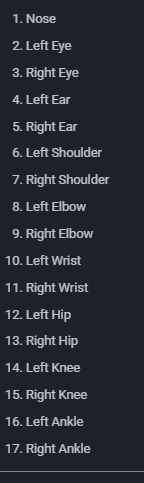

In [ ]:
# Load a model
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
model = YOLO("yolo11n-pose.pt")  # load an official model

frame = cv2.imread("./1490_original.jpg")
results = model("./1490_original.jpg")  # predict on an image
# Predict with the model
# Access the results
widest_person = None
max_width = 0

for result in results:
    # boxes = result.boxes  # Boxes object for bounding box outputs
    # masks = result.masks  # Masks object for segmentation masks outputs
    # keypoints = result.keypoints  # Keypoints object for pose outputs
    # probs = result.probs  # Probs object for classification outputs
    # obb = result.obb  # Oriented boxes object for OBB outputs
    # # get only torso keypoints

    kp = result.keypoints.xy[0].cpu().numpy()
    result.show()
    
    left_shoulder = int(kp[5][0]), int(kp[5][1])
    right_shoulder = int(kp[6][0]), int(kp[6][1])
    
    left_elbow = int(kp[7][0]), int(kp[7][1])
    right_elbow = int(kp[8][0]), int(kp[8][1])
    
    right_hip = int(kp[11][0]), int(kp[11][1])
    
    # Add some additional width to make sure that contains the whole jersey number
    # and decrease the height to centralize more the number
    left_shoulder = (left_shoulder[0] - 5, left_shoulder[1] + 5)
    right_shoulder = (right_shoulder[0] + 5, right_shoulder[1] + 5)
    
    if(left_elbow[0] - right_elbow[0] < 10 and left_shoulder[0] - right_shoulder[0] < 10):
        x_min = 20
        x_max = frame.shape[0] - 20
        y_min = min(left_shoulder[1], right_shoulder[1])
    elif((left_elbow[0] - right_elbow[0] < left_shoulder[0] - right_shoulder[0]) or (left_elbow[0] == 0 or right_elbow[0] == 0)):
        x_min = min(left_shoulder[0], right_shoulder[0])
        x_max = max(left_shoulder[0], right_shoulder[0])
        y_min = min(left_shoulder[1], right_shoulder[1])
    else:
        x_min = min(left_elbow[0], right_elbow[0])
        x_max = max(left_elbow[0], right_elbow[0])
        y_min = min(left_shoulder[1], right_shoulder[1]) 
 
    y_max = right_hip[1]  


    cropped_frame = frame[y_min:y_max, x_min:x_max]
    plt.imshow(cropped_frame)    
    plt.show()
    cv2.imwrite("cropped.jpg", cropped_frame)